In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_items = pd.read_csv('items.csv', index_col='item_id')
df_categories = pd.read_csv('categories.csv', index_col='category_id')
df_shops = pd.read_csv('shops.csv', index_col='shop_id')
df_test = pd.read_csv('test.csv')


In [ ]:
df_shops

,shop_name
shop_id,
0,"! Yakutsk Ordzhonikidze, 56 francs"
1,"! Yakutsk TC ""Central"" fran"
2,"Adygea TC ""Mega"""
3,"Balashikha TC ""Oktyabr-Kinomir"""
4,"Volga TC ""Volga Mall"""
5,"Vologda SEC ""Marmelad"""
6,"Voronezh (Plekhanovskaya, 13)"
7,"Voronezh SEC ""Maksimir"""
8,"Voronezh SEC City-Park ""Grad"""


In [ ]:
df_items.describe()
# df_categories.describe()
# df_shops.describe()

,category_id
count,22170.000000
mean,46.290753
std,15.941486
min,0.000000
25%,37.000000
50%,40.000000
75%,58.000000
max,83.000000


In [ ]:
df_categories.describe()
# df_shops.describe()

,category_name
count,84
unique,84
top,Gifts - Attributes
freq,1


In [ ]:
df_shops.describe()

,shop_name
count,60
unique,60
top,Sergiev Posad 7Ya shopping center
freq,1


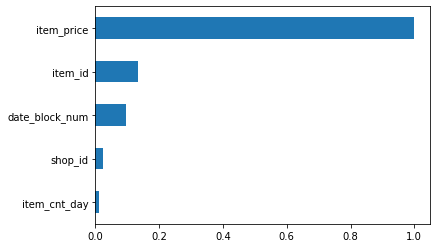

In [ ]:
df_train.corr()["item_price"].abs().sort_values().plot.barh();

In [ ]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
df_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [ ]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

<AxesSubplot:xlabel='date'>

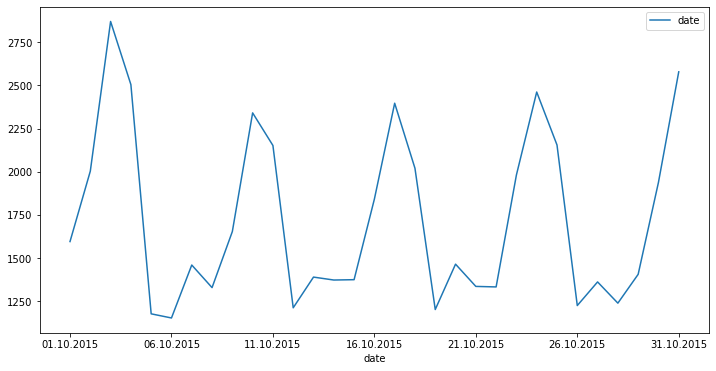

In [ ]:
df_train.groupby("date").agg({"date": "count"}).plot(figsize=(12, 6))

In [ ]:
df_train["shop_id"].nunique(), df_train["item_id"].nunique()

(44, 5413)

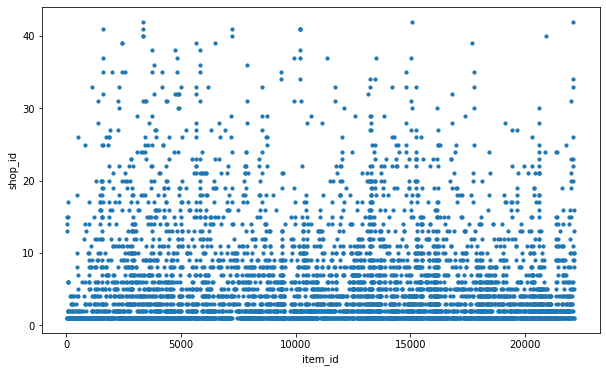

In [ ]:
df_train.groupby("item_id").agg({"shop_id": "nunique"}).reset_index().plot.scatter("item_id", "shop_id", figsize=(10, 6), s=10);

In [ ]:
df_33 = df_train.loc[df_train['date_block_num']==33]

In [ ]:

oct2015 = train[train.date_block_num==33]

In [ ]:
df_train.drop(df_train.loc[df_train['date_block_num'] != 33 ].index, inplace=True)

df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2882335,23.10.2015,33,45,13315,649.0,1.0
2882336,05.10.2015,33,45,13880,229.0,1.0
2882337,02.10.2015,33,45,13881,659.0,1.0
2882338,12.10.2015,33,45,13881,659.0,1.0
2882339,04.10.2015,33,45,13923,169.0,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [ ]:
df_train.groupby(['date_block_num']).agg(['mean'])

,shop_id,item_id,item_price,item_cnt_day
,mean,mean,mean,mean
date_block_num,,,,
33,31.580969,10799.986583,1224.574825,1.327802


In [ ]:
df_train = df_train[df_train.item_cnt_day < 0]

In [ ]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
2883677,15.10.2015,33,46,3350,2999.0,-1.0,15.10.2015
2883749,08.10.2015,33,46,6503,1999.0,-1.0,08.10.2015
2884570,04.10.2015,33,41,3353,3999.0,-1.0,04.10.2015
2885471,19.10.2015,33,44,3835,2199.0,-1.0,19.10.2015
2885519,08.10.2015,33,42,12664,249.0,-1.0,08.10.2015
...,...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0,26.10.2015
2934462,18.10.2015,33,25,4896,6398.0,-1.0,18.10.2015
2935263,05.10.2015,33,25,10039,249.0,-1.0,05.10.2015
2935643,16.10.2015,33,25,7893,2990.0,-1.0,16.10.2015


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32ebab46-e526-42a3-8966-92f4ff6ef571' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>